#HW1: "Find contours of ball and radius"

##Data

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
import imutils

In [15]:
img = cv2.imread('whiteballssample.jpg',0)
img.shape

(1512, 2016)

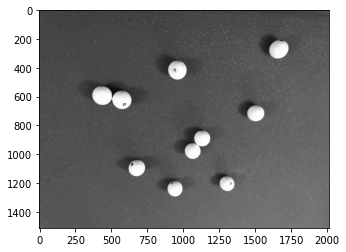

In [16]:
plt.imshow(img,cmap='gray')

## Preparation

### Binarization

In [17]:
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    

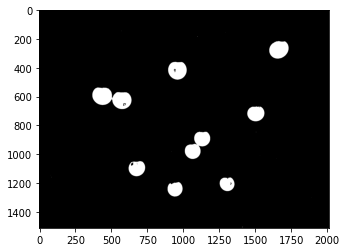

In [18]:
_, img_bin = cv2.threshold(img_gray, 131, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(img_bin, cmap='gray')

### Morth operation

In [19]:
kernel1 = np.ones((30,30), np.uint8)
morph1 = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel1)
kernel2 = np.ones((1,1), np.uint8)
morph2 = cv2.morphologyEx(morph1, cv2.MORPH_CLOSE, kernel2)

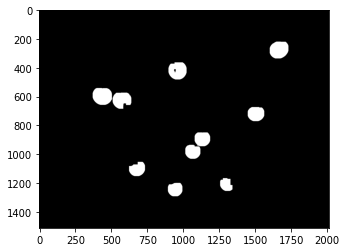

In [20]:
plt.imshow(morph2, cmap='gray')

## Find contours of balls

In [21]:
contour_img = morph2.copy()
contours = cv2.findContours(contour_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
count_balls = len(contours)
print('Number of balls:', count_balls)

Number of balls: 10


## Search diameter 

In [22]:
coordinate_list = [[balls.T[0], balls.T[1]] for balls in contours] 
length1 = [coord1.max() - coord1.min() for coord1, coord2 in coordinate_list]
length2 = [coord2.max() - coord2.min() for coord1, coord2 in coordinate_list]
diametr = [length1[i] if length1[i] >= length2[i] else length2[i] for i in range(count_balls)]

diametr = np.array(diametr)
radius = diametr/2

print(f"D = {np.var(radius)}")
print(f"Radius = {radius.mean()}")

D = 49.2225
Radius = 56.95
